# 3.6 Lab: Linear Regression

## 3.6.1 Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# in Python, module can be imported by a command similar to 'import numpy as np'. 
# it is a good practice to maintain a section at the beginning of the notebook to import all necessary modules.
# for new module, could use pip to install it. 
# for example 'pip install numpy'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import *
from sklearn import datasets, linear_model
from patsy import dmatrices

import seaborn as sns
sns.set_theme()
sns.set_style("ticks")

In [6]:
# since in Python, there is no default MASS module and Boston dataset, I will read in the Boston dataset from CSV. The data is in the ./data folder.
Boston = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/Sharing_ISL_python/master/data/Boston.csv', header=0)

## 3.6.2 Simple Linear Regression

In [4]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
Boston.describe(include='all')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
# to have similar formula notation as R, use the following import. 
# One thing to note is that the ' ' for the formula part in fitting step and the '.fit()' at the end.
# import statsmodels.formula.api as smf, we would use smf to call the model. Of course, there are other ways to run linear regression in pythin, such as sklearn.
lm = smf.ols ('medv~lstat', data=Boston).fit()

In [14]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           5.08e-88
Time:                        11:06:09   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [15]:
# use dir() to get a list of all the attributes an object has
dir(lm)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [16]:
# we can try a few 
print(lm.params)
print(lm.conf_int())

Intercept    34.553841
lstat        -0.950049
dtype: float64
                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


In [17]:
# provide prediction for 3 observations
lm.predict(pd.DataFrame({'lstat':[5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [18]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


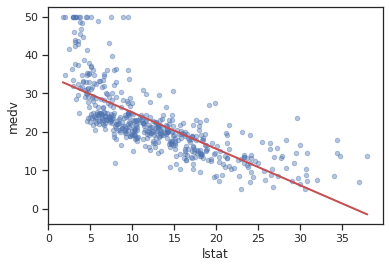

In [24]:
# plot the fitted line, we only take two extreme points to make the plot
X_new = pd.DataFrame({'lstat': [Boston.lstat.min(), Boston.lstat.max()]})
preds = lm.predict(X_new)
Boston.plot(kind='scatter', x='lstat', y='medv', alpha=0.4)
plt.plot(X_new.values, preds.values, c='r', linewidth=2)
plt.show()

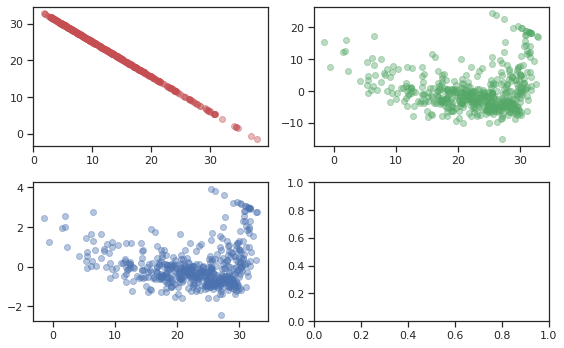

In [29]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(8,5))
ax1.plot(Boston.lstat, lm.predict(),'ro', alpha=0.4)
ax2.plot(lm.predict(), lm.resid, 'go', alpha=0.4)
ax3.plot(lm.predict(), lm.resid_pearson, 'bo', alpha=0.4)
plt.tight_layout()
plt.show()

In [30]:
# the statistics of the linear regression mostly stored in lm.get_influence(), for example, the cookdistances, leverage.
dir(lm.get_influence())
# for example, the following identifies the observation with the largest leverage 
np.argmax(lm.get_influence().hat_matrix_diag)

374

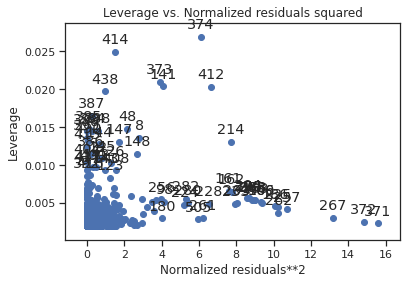

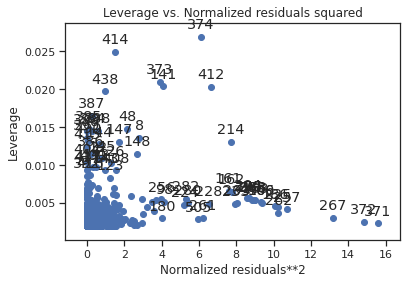

In [31]:
# from statsmodels.graphics.regressionplots import * just as a reference
plot_leverage_resid2(lm)

In [32]:
# as mentioned above. For machine learning models, sklearn is the most common used module, but sklearn is a little bit less on statistics.
x = pd.DataFrame(Boston.lstat)
y = Boston.medv
print(x.shape)

model = linear_model.LinearRegression()
model.fit(x, y)
print(model.intercept_)
print(model.coef_)

(506, 1)
34.55384087938311
[-0.95004935]


## 3.6.3 Multiple Linear Regression

In [33]:
# we can still use smg.ols to run multiple linear regression.
lm = smf.ols ('medv~lstat+age', data = Boston).fit()

In [34]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           2.98e-88
Time:                        11:11:56   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [35]:
# if we want to use all the variable. We can use the following trick to manually construct the list. In Python, most of time, you have to manully construct the variable list.
all_columns = "+".join(Boston.columns.difference(["medv"]))
my_formula = "medv~" + all_columns
lm = smf.ols(my_formula, data=Boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.72e-135
Time:                        11:11:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [28]:
# unlike R, Python is not fully up speeded to all the statistics. If you want to have the VIF of the variables in LM, you have to code a little bit.
# from patsy import dmatrices
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
y, X = dmatrices(my_formula, data=Boston, return_type='dataframe')
vif_coeff = {}
for i in range(X.shape[1]):
    vif_coeff[X.columns[i]] = variance_inflation_factor(np.array(X.dropna()),i)
    
print(vif_coeff)

{'Intercept': 585.2652379423121, 'age': 3.1008255128153372, 'black': 1.3485210764063755, 'chas': 1.0739953275537883, 'crim': 1.7921915474332413, 'dis': 3.955944906372728, 'indus': 3.9915964183460333, 'lstat': 2.9414910780919348, 'nox': 4.393719847577495, 'ptratio': 1.7990840492488973, 'rad': 7.484496335274478, 'rm': 1.9337444357832563, 'tax': 9.00855394759707, 'zn': 2.298758178749441}


## 3.6.4 Interaction Terms

In [37]:
# we use * to add interaction terms
lm = smf.ols('medv~lstat * age', data=Boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           4.86e-88
Time:                        11:12:08   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## 3.6.5 Non-linear Transformations of the Predictors 

In [38]:
lm_order1 = smf.ols('medv~ lstat', data=Boston).fit()
lm_order2 = smf.ols('medv~ lstat+ I(lstat ** 2.0)', data=Boston).fit()
print(lm_order2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.56e-112
Time:                        11:12:12   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          42.8620      0.872     

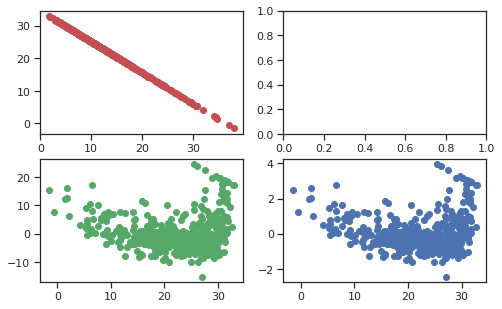

In [39]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(8,5))
ax1.plot(Boston.lstat, lm_order1.predict(),'ro')
ax3.plot(lm_order1.predict(), lm_order1.resid, 'go')
ax4.plot(lm_order1.predict(), lm_order1.resid_pearson, 'bo')
plt.show()

### if we added in the second order, we can see the residues are more random

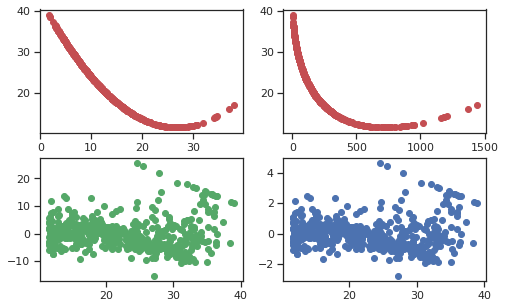

In [40]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(8,5))
ax1.plot(Boston.lstat,  lm_order2.predict(),'ro')
ax2.plot(Boston.lstat ** 2.0,  lm_order2.predict(),'ro')
ax3.plot(lm_order2.predict(), lm_order2.resid, 'go')
ax4.plot(lm_order2.predict(), lm_order2.resid_pearson, 'bo')
plt.show()

In [42]:
# there is anova function built in already in statsmodels.  
# if you know what to do, use the key words to google it and likely you will find a very good answer. 
# here we compare the models with one order of stat and two orders of stats. 
# by looking at the p value that will reject the null hypothesis that the coefficent of lstat**2 equals 0.
table = sm.stats.anova_lm(lm_order1, lm_order2)
table

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


In [43]:
lm_log = smf.ols('medv~ np.log(rm)', data=Boston).fit()
print(lm_log.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.22e-64
Time:                        11:12:50   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.0

## 3.6.6 Qualitative Predictors 

I prepared the Carseats file from .Rdata. And it is saved under the data folder.  Let us load them in and explore this dataset.

In [44]:
Carseats = pd.read_csv('https://raw.githubusercontent.com/tvanzyl/Sharing_ISL_python/master/data/Carseats.csv', header=0)

In [45]:
list(Carseats)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [46]:
Carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [47]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [48]:
lm_carseats = smf.ols('Sales ~ Income + Advertising + Price + Age', data = Carseats).fit()

In [50]:
print(lm_carseats.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     58.21
Date:                Wed, 14 Sep 2022   Prob (F-statistic):           1.33e-38
Time:                        11:13:13   Log-Likelihood:                -889.67
No. Observations:                 400   AIC:                             1789.
Df Residuals:                     395   BIC:                             1809.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.1829      0.777     19.542      

In [51]:
# let us create dummy variables using get_dummies, then exclude the first dummy column
ShelveLoc_dummies = pd.get_dummies(Carseats.ShelveLoc, prefix='ShelveLoc').iloc[:,1:]

In [52]:
Carseats_dummy = pd.concat([Carseats, ShelveLoc_dummies], axis=1)
Carseats_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,0


In [53]:
# then the model buliding will be the same with all numerrical variables.
lm_carseats_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium', 
                            data = Carseats_dummy).fit()

In [54]:
# the interpretation of the coefficients are holding everything fixed, Medium shelve location is associated with an average
# increase of sale around 2.0046. 
print(lm_carseats_dummy.summary() )

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.33e-101
Time:                        11:13:26   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.4006      0.545  

In [55]:
# Compapre the summary of two models, one with explicit encoding of dummy varible, while the other used the built-in function.
lm_carseats_wo_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + C(ShelveLoc)', 
                            data = Carseats).fit()
print(lm_carseats_wo_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.33e-101
Time:                        11:13:35   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13

## 3.6.7 Writing Functions

In [56]:
# let us write a simple function to print current time. 
# yhe key word in Python for user defined function is 'def'. 
# pay attention to the ':'. The difference betwwen R (others) and Python is that Python 
# forces you to obey its indentation rules. For example, the following function won't work because of the extra space in front of 'print'.
def print_current_time_wrong():
    from datetime import datetime # this is very bad practice !!! 
    print(str(datetime.now()))  

In [57]:
def print_current_time():
    from datetime import datetime
    print (str(datetime.now())) 

In [58]:
print_current_time()

2022-09-14 11:13:40.562081


In [51]:
# End of Chapter 3.